# Objectives
- Explore the features of houses to get an understanding of how they affect housing prices
- Build an efficient model that can predict housing prices

# 1. Data Cleaning

## 1.1. Unpacking the data

In [1]:
#Import Starter Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Open train and test datasets and create copies
train = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Kaggle files\\Projects - Regression\\house-prices-advanced-regression-techniques\\train.csv')
test = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Kaggle files\\Projects - Regression\\house-prices-advanced-regression-techniques\\test.csv')
raw_train = train[:]
raw_test = test[:]

In [3]:
#Overview of the training dataset and test dataset
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

- The training dataset is a small dataset with 1460 rows and 81 columns
- The test dataset is of similar size with 1459 rows and 80 columns, missing only the target variable as we aim to predict the values of that column without prior knowledge of what the values are

## 1.2 Checking for  Missing Data
- After reading the descriptions of the data we understand that the data that is missing isn't necessarily missing and should be replaced with a string value representing its value
- Will merge the training and test dataset so as not to perform data cleaning operations twice

In [5]:
raw_train.isnull().sum().sum(), raw_test.isnull().sum().sum(), raw_train.isnull().sum().sum() + raw_test.isnull().sum().sum()

(6965, 7000, 13965)

In [6]:
raw_data = pd.concat([raw_train, raw_test], sort = False).reset_index(drop = True)
raw_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [7]:
raw_data.iloc[:, 0:80].isnull().sum().sum()

13965

In [8]:
raw_feat = raw_data.iloc[:, 1:80]

In [9]:
#Create a table containing all the info about the missing values per feature
num_null = pd.DataFrame(raw_feat.isnull().sum().sort_values(ascending = False), columns = ['# of Missing Values']).reset_index()
num_null.columns = ['Features', '# of Missing Values']
num_null['% Missing'] = round(num_null['# of Missing Values']/len(raw_feat), 2)
num_null['Data Type'] = [raw_feat[feat].dtype for feat in num_null['Features']]
num_null.head()

,Features,# of Missing Values,% Missing,Data Type
0,PoolQC,2909,1.00,object
1,MiscFeature,2814,0.96,object
2,Alley,2721,0.93,object
3,Fence,2348,0.80,object
4,FireplaceQu,1420,0.49,object


In [10]:
#Only interested in the features with missing values so we will subset the table to only include features that are missing
num_null = num_null[num_null['# of Missing Values'] > 0]
num_null

,Features,# of Missing Values,% Missing,Data Type
0,PoolQC,2909,1.00,object
1,MiscFeature,2814,0.96,object
2,Alley,2721,0.93,object
3,Fence,2348,0.80,object
4,FireplaceQu,1420,0.49,object
5,LotFrontage,486,0.17,float64
6,GarageCond,159,0.05,object
7,GarageQual,159,0.05,object
8,GarageYrBlt,159,0.05,float64
9,GarageFinish,159,0.05,object


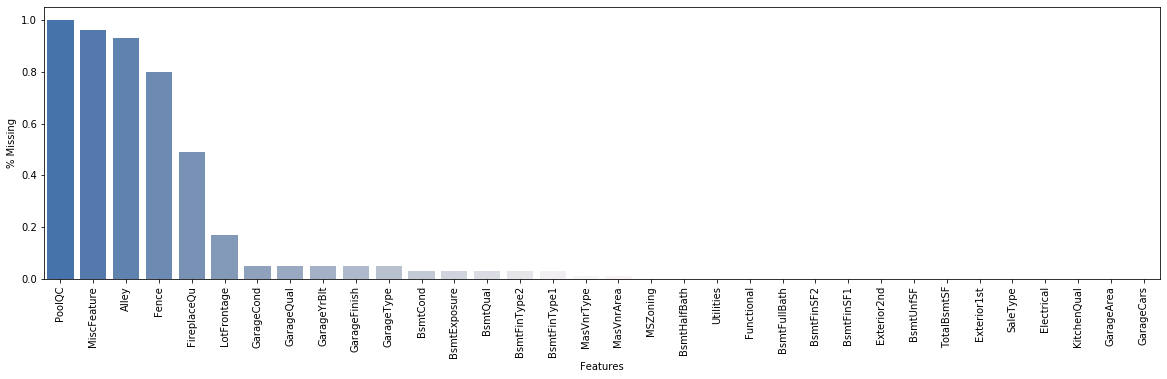

In [11]:
#Plot of Features with missing values
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(num_null['Features'], '% Missing', data = num_null, palette = 'vlag')
plt.xticks(rotation=90)
plt.show()

- We can see from the table above that a large majority of the features with missing values are categorical variables.
- As mentioned before the missing data in the categorical features are necessarily missing, while for the numeric features they are missing. So how we handle the missing data will be different depending on the data type
- Of note are the 4 categorical features with missing data over 80%. What this shows is that for some features, there are some dominating categories. How useful these features will be explored in the next section

### 1.2.1 Handling Missing Data

#### Categorical Features
- Cases
    1. Case where feature has missing value which actually represents the house not having that particular feature. Will replace missing values with 'NA' to represent the the house not having that feature
    2. Case where feature is actually missing values. Will replace missing values with most frequent value (mode)
    3. Numeric features with missing values have a corresponding categorical feature whose value is 'NA' showing that house does have that feature hence the numeric value should be 0
    4. Lot frontage will use Multivariate Imputation by Chained Equation. How it works is by treating a desired column as a target variable and making predictions about what the values will be based on some or all of the remaining variables.

In [12]:
#Case 1: Replacing missing values representing missing features on a house with 'NA'
case_1 = ['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MasVnrType',
 'MiscFeature',
 'PoolQC', 'MSZoning']

for col in case_1:
    raw_data[col].replace(np.nan, 'NA', inplace=True)
    
    
#Case 2: Replacing missing values the most frequent value in the column
case_2 = ['Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'KitchenQual',
 'SaleType',
 'Utilities']


for col in case_2:
    raw_data[col].replace(np.nan, raw_data[col].mode()[0], inplace=True)

In [13]:
raw_data.isnull().sum().sum()

2137

#### Numerical Features

In [14]:
num_feat = num_null[num_null['Data Type'] != 'object']['Features'].to_list()
num_feat

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtHalfBath',
 'BsmtFullBath',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars']

In [15]:
#Case 3: Replacing missing values that actually mean 0 with numeric value 0.
case_3 = num_feat[1:]

for col in case_3:
    raw_data[col].replace(np.nan, 0, inplace=True)
    
#Case 4: Replacing missing values in lot frontage with the most frequent value based on neighborhood groupings
raw_data['LotFrontage'] = raw_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(int(x.median())))

In [16]:
#Create a table containing all the info about the missing values per feature
num_null2 = pd.DataFrame(raw_data.isnull().sum().sort_values(ascending = False), columns = ['# of Missing Values']).reset_index()
num_null2.columns = ['Features', '# of Missing Values']
num_null2['% Missing'] = round(num_null2['# of Missing Values']/len(raw_data), 2)
num_null2['Data Type'] = [raw_data[feat].dtype for feat in num_null2['Features']]
num_null2.head()

,Features,# of Missing Values,% Missing,Data Type
0,SalePrice,1459,0.5,float64
1,Heating,0,0.0,object
2,RoofStyle,0,0.0,object
3,RoofMatl,0,0.0,object
4,Exterior1st,0,0.0,object


In [17]:
#raw_data.groupby("Neighborhood")['LotFrontage'].get_group('ClearCr')

### 1.2.2 Transforming Columns to appropriate data types
- MoSold is discrete and shows the months in which the house was sold so makes sense to catgroize it
- YrSold they are not that many years so we can categorize this too
- MSSubClass describes the building type

In [18]:
raw_data['MSSubClass'] = raw_data['MSSubClass'].astype(str)

raw_data['MoSold'] = raw_data['MoSold'].astype(str)

raw_data['YrSold'] = raw_data['YrSold'].astype(str)

In [19]:
print(raw_data['YrSold'].dtype)

object


# 2. Exploratory Analysis and Data Visualization
- Now that we have cleaned the data we can explore the relationships between the variables and the sales price
- We will look split this section into Categorical and Numeric variables

In [20]:
train_data = raw_data.iloc[:1460, 1:81]
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125.0


In [21]:
#Create list of categorical and numeric columns
col_list = train_data.columns[0:79]
cat_cols = [col for col in col_list if train_data[col].dtype == 'object']
num_cols = [col for col in col_list if train_data[col].dtype != 'object']

#### Categorical Features and their relationship with sales price

In [22]:
def cat_avg(cat_col):
    fig, axes = plt.subplots(16, 3, figsize=(25, 80))
    axes = axes.flatten()
    for col, axe in zip(cat_col, axes):
        prices = train_data.groupby(col)['SalePrice'].median().sort_values(ascending = False)
        sns.violinplot(x = col, y = 'SalePrice', data = train_data, order = prices.index, ax = axe)
        axe.tick_params(labelrotation=45)
        plt.tight_layout()

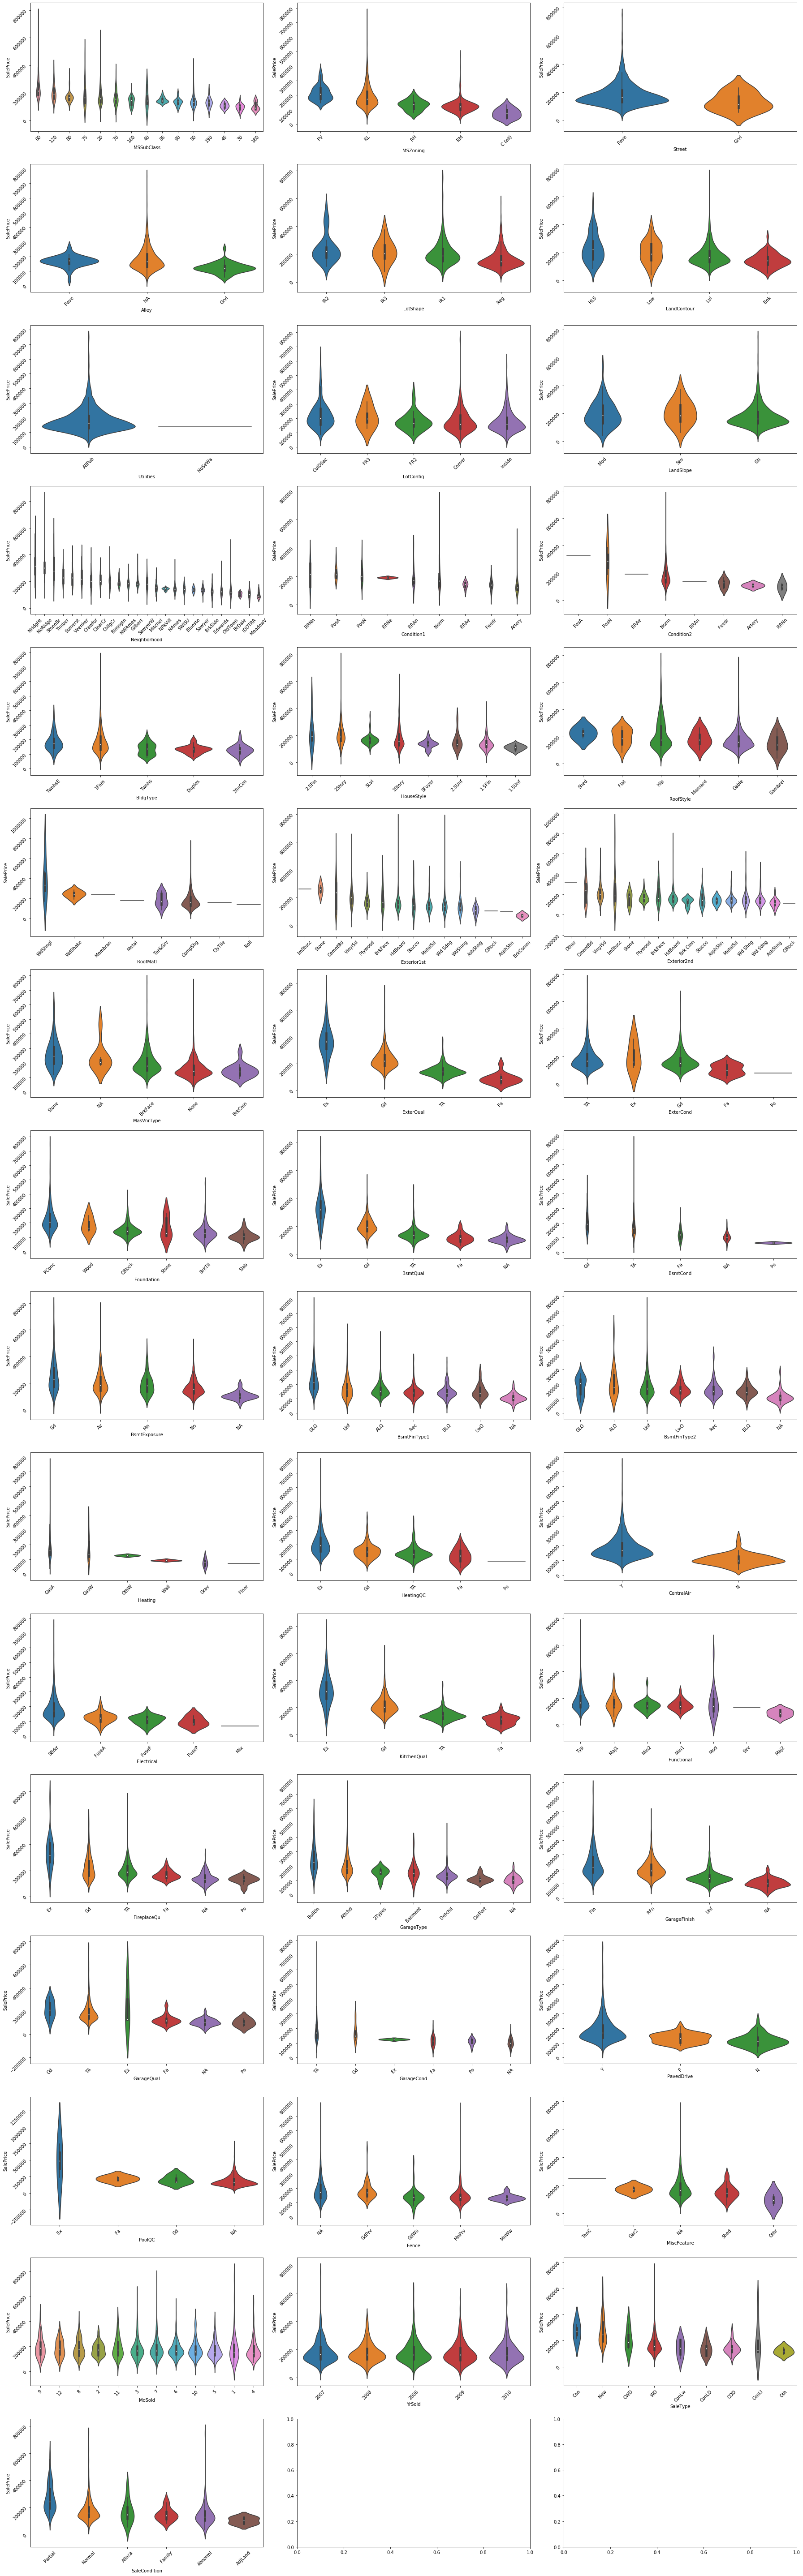

In [23]:
cat_avg(cat_cols)

In [24]:
def num_avg(num_col):
    fig, axes = plt.subplots(11, 3, figsize=(25, 80))
    axes = axes.flatten()
    for col, axe in zip(num_col, axes):
        prices = train_data.groupby(col)['SalePrice'].median().sort_values(ascending = False)
        sns.regplot(x = col, y = 'SalePrice', data = train_data, ax = axe)
        axe.tick_params(labelrotation=45)
        plt.tight_layout()

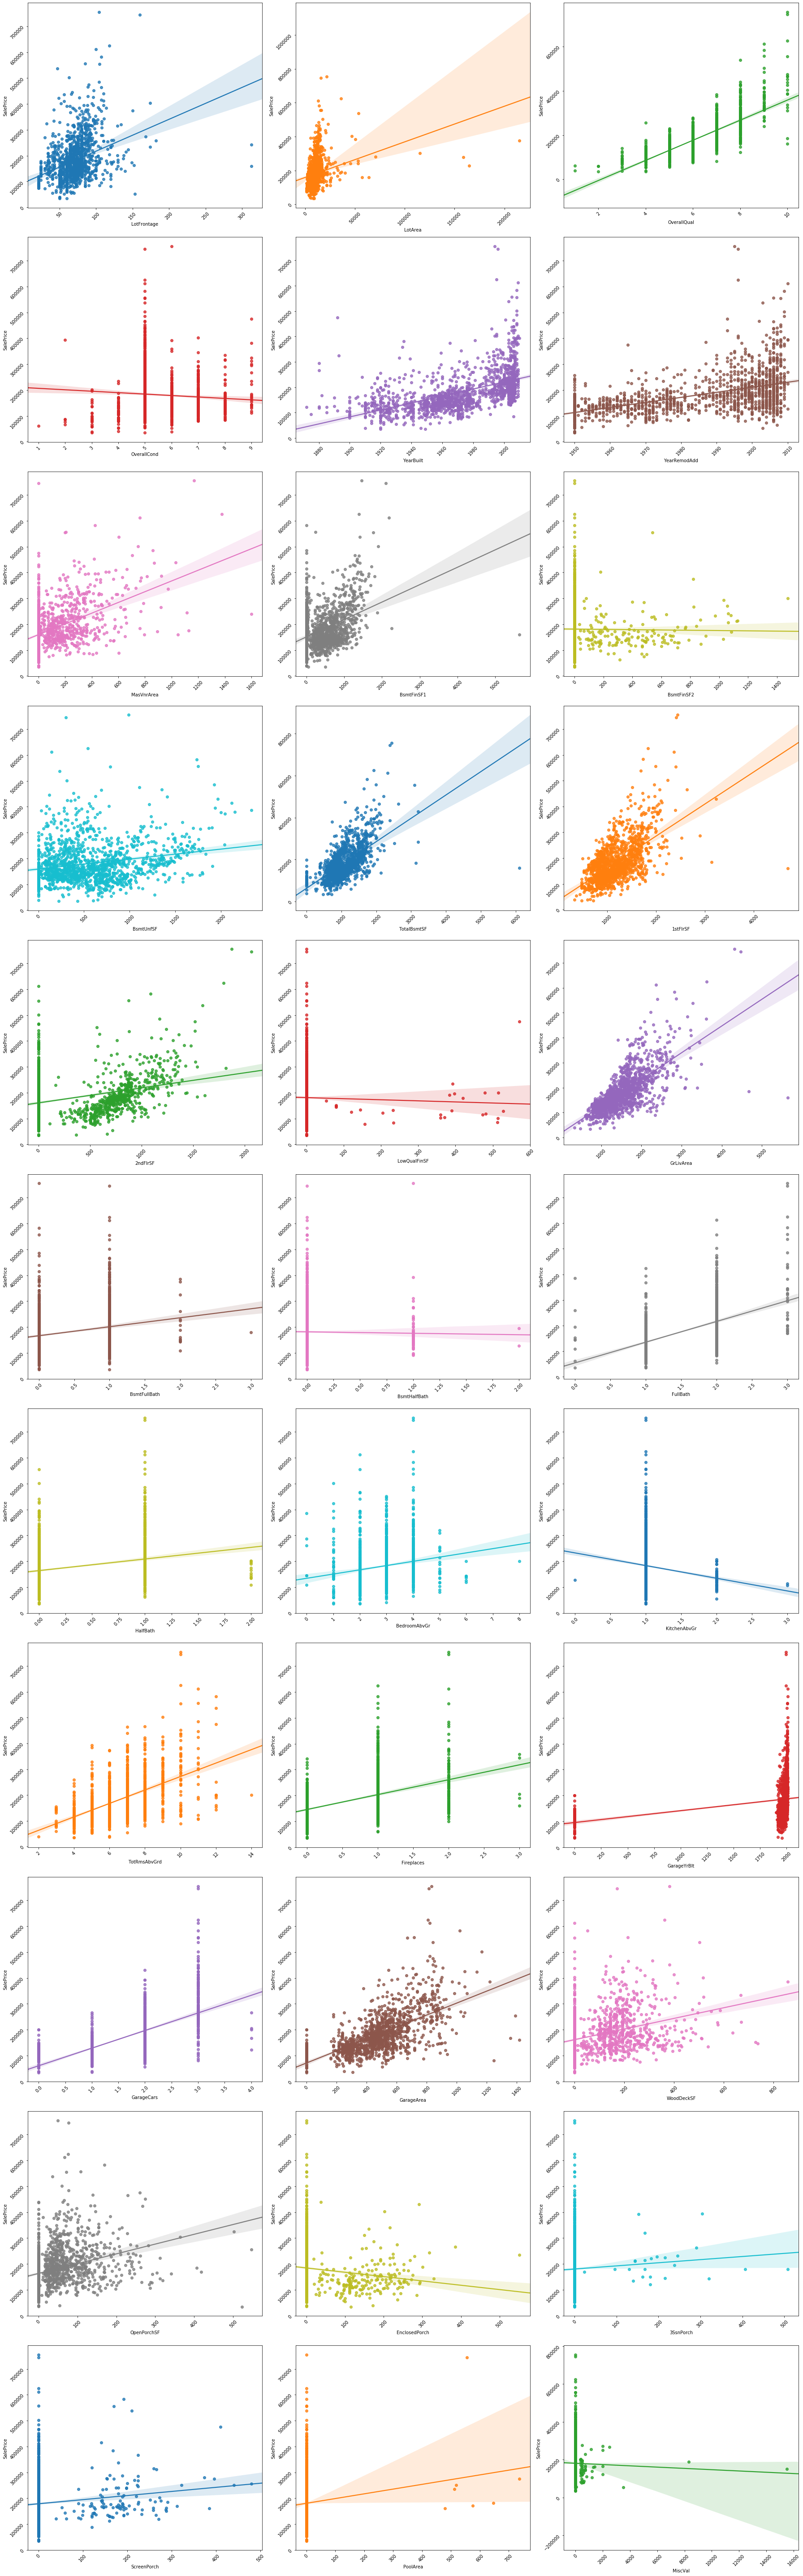

In [25]:
num_avg(num_cols)

# Data Transformation
- Encoding
- Standardization
- Log Transformation of Response Variable

#### Label Encoding
- For tree based algorithms

In [67]:
#Separating the Explanatory Variables
features = raw_data.iloc[:, 1:80]
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
for val in cat_cols:
    features[val + 'a'] = LabelEncoder().fit_transform(features[val])

In [71]:
lfeatures = features.drop(cat_cols, axis = 1)
lfeatures

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageQuala,GarageConda,PavedDrivea,PoolQCa,Fencea,MiscFeaturea,MoSolda,YrSolda,SaleTypea,SaleConditiona
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,5,5,2,3,4,1,4,2,8,4
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,5,5,2,3,4,1,7,1,8,4
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,5,5,2,3,4,1,11,2,8,4
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,5,5,2,3,4,1,4,0,8,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,5,5,2,3,4,1,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,3,3,2,3,4,1,8,0,8,4
2915,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,5,5,2,3,4,1,6,0,8,0
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,5,5,2,3,4,1,11,0,8,0
2917,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,3,3,2,3,2,3,9,0,8,4


#### One Hot Encoding and Standard Scaling
- For Linear and distance based algorithms
- One Hot Encode Categorical variables
- Standardize Numerical variables
- Log transform target variable

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [73]:
col_trans = make_column_transformer((StandardScaler(), num_cols), (OneHotEncoder(), cat_cols))

In [74]:
ofeatures = col_trans.fit_transform(features)

In [82]:
ofeatures

<1x334 sparse matrix of type '<class 'numpy.float64'>'
	with 79 stored elements in Compressed Sparse Row format>

#### Log Transform Response

In [33]:
y2 = np.log1p(y)

#### Splitting Training and test Features

In [85]:
X = lfeatures.iloc[:1460,]
y = raw_data.iloc[:1460, 80]

In [86]:
X2 = ofeatures[:1460]
y2 = np.log1p(y)

# Modelling

In [87]:
#Libraries for Model Building and Evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [88]:
#Model Fitting Function
def model_eval(alg, x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    alg.fit(X_train, y_train)
    y_pred = np.round(alg.predict(X_test))
    print('R2 Score:', metrics.r2_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))    

    

#    score = cross_val_score(alg, X_train, y_train, cv = cv, scoring = 'neg_root_mean_squared_error').mean()
#    return abs(score)

### Tree Based

#### Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [90]:
model_eval(rfr, X, y)

R2 Score: 0.8989043703196625
Mean Absolute Error: 16824.027397260274
Mean Squared Error: 705454782.7305936
Root Mean Squared Error: 26560.398768290237


#### Gradient Boosting Classifier

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [92]:
model_eval(gbr, X, y)

R2 Score: 0.896099825239322
Mean Absolute Error: 16641.600456621003
Mean Squared Error: 725025161.2579908
Root Mean Squared Error: 26926.291264449897


#### Voting Regressor

In [93]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('rfr', rfr), ('gbr', gbr)])

In [94]:
model_eval(vr, X, y)

R2 Score: 0.9029406844476628
Mean Absolute Error: 16200.100456621005
Mean Squared Error: 677289004.2968036
Root Mean Squared Error: 26024.77673865433


### Linear Models

#### Ridge

In [95]:
from sklearn.linear_model import Ridge
rge = Ridge()

In [96]:
model_eval(rge, X2, y2)

R2 Score: 0.4905497046892787
Mean Absolute Error: 0.24347369666901483
Mean Squared Error: 0.08642515621207547
Root Mean Squared Error: 0.2939815576053632


#### Lasso

In [97]:
from sklearn.linear_model import Lasso
lso = Lasso()

In [98]:
model_eval(lso, X2, y2)

R2 Score: -0.0009597058012948967
Mean Absolute Error: 0.31654466646365353
Mean Squared Error: 0.16980675000513534
Root Mean Squared Error: 0.4120761458822087


#### Elasticnet

In [99]:
from sklearn.linear_model import ElasticNet
eln = ElasticNet()

In [102]:
model_eval(eln, X2, y2)

R2 Score: -0.0009597058012948967
Mean Absolute Error: 0.31654466646365353
Mean Squared Error: 0.16980675000513534
Root Mean Squared Error: 0.4120761458822087


#### Support Vector Machine Regressor

In [103]:
from sklearn.svm import SVR
svr = SVR()

In [104]:
model_eval(svr, X2, y2)

R2 Score: 0.5000852905787957
Mean Absolute Error: 0.24185604229201124
Mean Squared Error: 0.08480750183507185
Root Mean Squared Error: 0.29121727599006186


# Predicting Test Set

In [109]:
ctest = raw_data.iloc[1460:, 0:80]
xtest1 = lfeatures.iloc[1460:,]
xtest2 = ofeatures[1460:]

In [110]:
ctest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1461,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1462,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1463,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
1464,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


In [111]:
y_pred3 = rfr.predict(xtest1)
y_pred4 = gbr.predict(xtest1)
y_pred5 = vr.predict(xtest1)
y_pred6 = rge.predict(xtest2)
y_pred7 = lso.predict(xtest2)
y_pred8 = eln.predict(xtest2)
y_pred9 = svr.predict(xtest2)

In [116]:
ctest['SalePrice'] = np.round(np.exp(y_pred6))
ctest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,118868.0
1461,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,145236.0
1462,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,173406.0
1463,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,6,2010,WD,Normal,194331.0
1464,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,0,NA,NA,NA,0,1,2010,WD,Normal,201523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2006,WD,Normal,77133.0
2915,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Abnorml,82783.0
2916,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,9,2006,WD,Abnorml,163124.0
2917,2918,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,113640.0


In [117]:
prediction = ctest[['Id', 'SalePrice']]
prediction.to_csv("rfr9.csv", index=False)
prediction

,Id,SalePrice
1460,1461,118868.0
1461,1462,145236.0
1462,1463,173406.0
1463,1464,194331.0
1464,1465,201523.0
...,...,...
2914,2915,77133.0
2915,2916,82783.0
2916,2917,163124.0
2917,2918,113640.0
